# Tutorial explaining the use of different emulators, from different archives

In [1]:
import os, sys
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# our modules
from lace.archive import gadget_archive
from lace.archive import nyx_archive
from lace.emulator.nn_emulator import NNEmulator
from lace.emulator.gp_emulator import GPEmulator

## CREATE TRAINING AND TESTING ARCHIVE (Gadget)

In [3]:
# list of emulator parameters used with Gadget sims
emu_params=['Delta2_p', 'n_p','mF', 'sigT_Mpc', 'gamma', 'kF_Mpc']

In [4]:
archive = gadget_archive.GadgetArchive(postproc="Pedersen21")
training_data=archive.get_training_data(emu_params=emu_params)
len(training_data)

330

In [5]:
testing_data = archive.get_testing_data(sim_label='mpg_central')
len(testing_data)

11

In [6]:
kMpc = testing_data[0]['k_Mpc']
kMpc = kMpc[(kMpc>0) & (kMpc<4)]

## NEURAL NETWORK EMULATOR  

Some of the cells in this notebooks can be quite slow, so we only run them if thorough==True

In [7]:
thorough=False

#### To create an emulator object, we can call NNemulator (to create a neural network emulator) or GP emulator (to create a Gaussian process emulator). 

### Example 1: We can train a custom emulator... 

#### A. passing a custom archive:

In [8]:
emulator = NNEmulator(archive=archive, nepochs=10)

Selected custom emulator
Use custom archive provided by the user


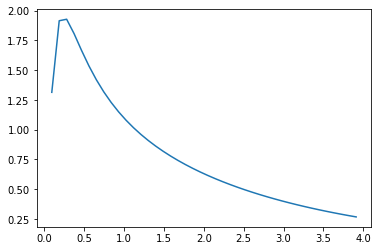

In [9]:
# test emulator by making simple plot
p1d = emulator.emulate_p1d_Mpc(testing_data[0],kMpc)
plt.plot(kMpc,p1d)

### or a training_set label

In [10]:
if thorough:
    emulator = NNEmulator(training_set='Cabayol23',nepochs=10)

#### If none or both are provided, the emulator fails. 

### Example 2: We can train a pre defined emulator... 

#### A. with a training_set label

In [11]:
if thorough:
    emulator = NNEmulator(training_set='Cabayol23', emulator_label='Cabayol23', nepochs=10)

#### B. with an archive

In [12]:
# currently we are passing a Pedersen21 archive and asking for Cabayol23 emulator (for emu settings)
emulator = NNEmulator(archive=archive,  emulator_label='Cabayol23', nepochs=10)

Select emulator in Cabayol23
Neural network emulating the optimal P1D of Gadget simulations fitting coefficients to a 5th degree polynomial. It goes to scales of 4Mpc^{-1} and z<=4.5. The parameters passed to the emulator will be overwritten to match these ones
Use custom archive provided by the user


### Example 3: Load a pre-trained emulator, providing the path of the saved network parameters

In [13]:
if thorough:
    emulator = NNEmulator(training_set='Cabayol23',emulator_label='Cabayol23',
                      model_path='NNmodels/NNEmulator_LaCEHC.pt', train=False)

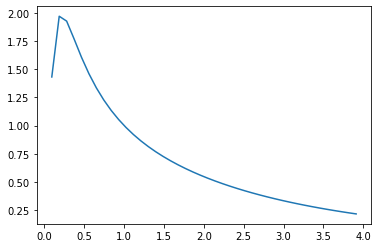

In [14]:
# test emulator by making simple plot
p1d = emulator.emulate_p1d_Mpc(testing_data[0],kMpc)
plt.plot(kMpc,p1d)

## GAUSSIAN PROCESS EMULATOR

## The Gaussian process emulator uses the following default parameters:

- paramList=['Delta2_p', 'n_p','mF', 'sigT_Mpc', 'gamma', 'kF_Mpc']
- kmax_Mpc=10
- ndeg=4

### Example 1: Train custom emulator 

#### with a defined training_set

In [15]:
if thorough:
    emulator = GPEmulator(training_set='Pedersen21')

#### with a custom archive

In [16]:
emulator = GPEmulator(archive=archive)

Use custom archive provided by the user
Selected custom emulator


 /Users/font/opt/anaconda3/envs/lace_env/lib/python3.8/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Training GP on 330 points
GPs optimised in 2.57 seconds


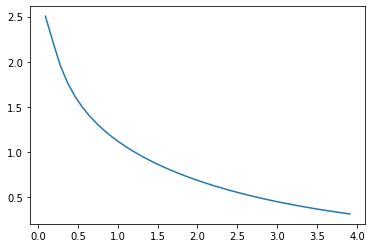

In [17]:
# test emulator by making simple plot
p1d = emulator.emulate_p1d_Mpc(testing_data[0],kMpc)
plt.plot(kMpc,p1d)

#### if both are provided, the emulator fails

### Example 2: Pre-defined GP emulators:

In [18]:
if thorough:
    emulator = GPEmulator(training_set='Pedersen21', emulator_label='Pedersen21')

In [19]:
if thorough:
    emulator = GPEmulator(training_set='Pedersen21', emulator_label='Pedersen23')

In [20]:
if thorough:
    emulator = GPEmulator(training_set='Pedersen21')

## LaCE-Nyx emulator (NN)

In [21]:
# emulators will use different emulator parameters depending on the archive
#gadget_emu_params = ['Delta2_p', 'n_p','mF', 'sigT_Mpc', 'gamma', 'kF_Mpc']
nyx_emu_params = ['Delta2_p', 'n_p','mF', 'sigT_Mpc', 'gamma', 'lambda_P']

In [22]:
# you could specify here the path to the Nyx files, or set a NYX_PATH variable
#nyx_fname = '/data/desi/scratch/HydroData/Emulator/nyx_files/models.hdf5'
nyx_fname=None
archive = nyx_archive.NyxArchive(file_name=nyx_fname,verbose=True,zmax=3.5)

read Nyx sim bar_ic_grid_3
do not read snapshot at 3.6
do not read snapshot at 3.8
do not read snapshot at 4.0
do not read snapshot at 4.2
do not read snapshot at 4.4
do not read snapshot at 4.6
do not read snapshot at 5.0
do not read snapshot at 5.4
read Nyx sim cosmo_grid_0
do not read snapshot at 3.6
do not read snapshot at 3.8
do not read snapshot at 4.0
do not read snapshot at 4.2
do not read snapshot at 4.4
do not read snapshot at 4.6
do not read snapshot at 5.0
do not read snapshot at 5.4
read Nyx sim cosmo_grid_1
do not read snapshot at 3.6
do not read snapshot at 3.8
do not read snapshot at 4.0
do not read snapshot at 4.2
do not read snapshot at 4.4
do not read snapshot at 4.6
do not read snapshot at 5.0
do not read snapshot at 5.4
read Nyx sim cosmo_grid_10
do not read snapshot at 3.6
do not read snapshot at 3.8
do not read snapshot at 4.0
do not read snapshot at 4.2
do not read snapshot at 4.4
do not read snapshot at 4.6
do not read snapshot at 5.0
do not read snapshot at 5.

In [23]:
emulator = NNEmulator(archive=archive, nepochs=100,emu_params=nyx_emu_params)

Selected custom emulator
Use custom archive provided by the user


In [24]:
training_data = archive.get_training_data(emu_params=nyx_emu_params)
kMpc = training_data[0]['k_Mpc']
kMpc = kMpc[(kMpc>0) & (kMpc<4)]

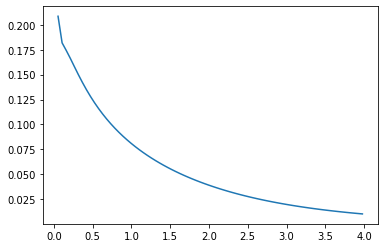

In [25]:
# test emulator by making simple plot
testing_data = archive.get_testing_data(sim_label='nyx_0',emu_params=nyx_emu_params)
p1d = emulator.emulate_p1d_Mpc(testing_data[0],kMpc)
plt.plot(kMpc,p1d)

In [26]:
emulator = NNEmulator(archive=archive, emulator_label='Cabayol23_Nyx')

Select emulator in Cabayol23_Nyx
Neural network emulating the optimal P1D of Nyx simulations fitting coefficients to a 5th degree polynomial. It goes to scales of 4Mpc^{-1} and z<=4.5. The parameters passed to the emulator will be overwritten to match these ones
Use custom archive provided by the user


In [27]:
if thorough:
    emulator = NNEmulator(training_set='Nyx23',emu_params=nyx_emu_params,nepochs=100)